In [1]:
import pandas as pd 
import numpy as np

In [2]:
# read table for medication doses taken over 24 week period
m = pd.read_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/raw_data_files/T_FRDOS.csv')

m.head()

,PATIENTNUMBER,SITE,VISIT,PATIENTID,VISITID,DOS002,DOS002_UNIT,DOS002_NORM,DOS005,DOS005_UNIT,DOS005_NORM,DOS006,DOS006_UNIT,DOS006_NORM,VISITDT,DOS001,DOS001_DT,VISITDT_Dt,patdeid
0,NaN,NaN,WK0,NaN,15034,2.0,NaN,2.0,8.0,NaN,8.0,1.0,NaN,1.0,NaN,NaN,.,0.0,1
1,NaN,NaN,WK1,NaN,15037,2.0,NaN,2.0,16.0,NaN,16.0,1.0,NaN,1.0,NaN,NaN,.,6.0,1
2,NaN,NaN,WK1,NaN,15037,2.0,NaN,2.0,24.0,NaN,24.0,1.0,NaN,1.0,NaN,NaN,.,6.0,1
3,NaN,NaN,WK1,NaN,15037,2.0,NaN,2.0,24.0,NaN,24.0,1.0,NaN,1.0,NaN,NaN,.,6.0,1
4,NaN,NaN,WK1,NaN,15037,2.0,NaN,2.0,32.0,NaN,32.0,1.0,NaN,1.0,NaN,NaN,.,6.0,1


In [3]:
# retrieve column names
m.columns

Index(['PATIENTNUMBER', 'SITE', 'VISIT', 'PATIENTID', 'VISITID', 'DOS002',
       'DOS002_UNIT', 'DOS002_NORM', 'DOS005', 'DOS005_UNIT', 'DOS005_NORM',
       'DOS006', 'DOS006_UNIT', 'DOS006_NORM', 'VISITDT', 'DOS001',
       'DOS001_DT', 'VISITDT_Dt', 'patdeid'],
      dtype='object')

In [4]:
# drop columns whose data we are not using for this analysis

m = m.drop(columns=['PATIENTNUMBER','DOS001','SITE', 'PATIENTID', 'VISITID','DOS002_UNIT', 'DOS002_NORM','DOS005_UNIT', 'DOS005_NORM','DOS006_UNIT', 'DOS006_NORM', 'VISITDT','DOS001_DT', 'VISITDT_Dt'], axis=1)

m.head()

,VISIT,DOS002,DOS005,DOS006,patdeid
0,WK0,2.0,8.0,1.0,1
1,WK1,2.0,16.0,1.0,1
2,WK1,2.0,24.0,1.0,1
3,WK1,2.0,24.0,1.0,1
4,WK1,2.0,32.0,1.0,1


In [5]:
# rename columns according to documentation for interpretability

new_columns = {'DOS002':'medication','DOS005':'total_dose','DOS006':'admin_location'}


In [6]:
# renaming columns

m = m.rename(columns=new_columns)

m.head()

,VISIT,medication,total_dose,admin_location,patdeid
0,WK0,2.0,8.0,1.0,1
1,WK1,2.0,16.0,1.0,1
2,WK1,2.0,24.0,1.0,1
3,WK1,2.0,24.0,1.0,1
4,WK1,2.0,32.0,1.0,1


In [7]:
# reorder columns for easier interpretation

m = m.reindex(columns=['patdeid','VISIT','medication','total_dose','admin_location'])

m.head()

,patdeid,VISIT,medication,total_dose,admin_location
0,1,WK0,2.0,8.0,1.0
1,1,WK1,2.0,16.0,1.0
2,1,WK1,2.0,24.0,1.0
3,1,WK1,2.0,24.0,1.0
4,1,WK1,2.0,32.0,1.0


In [12]:
m.loc[m.patdeid==1677].groupby('VISIT').agg('first')

,patdeid,medication,total_dose,admin_location
VISIT,,,,
WK0,1677,2.0,8.0,1.0
WK1,1677,2.0,16.0,1.0
WK10,1677,2.0,30.0,1.0
WK11,1677,2.0,28.0,1.0
WK12,1677,2.0,28.0,1.0
WK13,1677,2.0,26.0,1.0
WK14,1677,2.0,26.0,1.0
WK15,1677,NaN,NaN,NaN
WK16,1677,2.0,22.0,1.0


In [8]:
# check for class inbalance of medication prescribed, 1 = methadone, 2 = buprenorphine

m.medication.value_counts()

medication
2.0    79571
1.0    79054
Name: count, dtype: int64

In [9]:
# unique data points for total_dose column

len(m.total_dose.unique())

176

In [10]:
# distinct values within total_dose column

m.total_dose.unique()

array([  8.,  16.,  24.,  32.,   0.,  nan,  30.,  26.,  28.,  22.,  12.,
        40.,  50.,  60.,  65.,  70.,  75.,  80.,  90.,  95., 100.,  85.,
        14.,   2.,   4.,  20., 110., 135., 120., 130., 140.,  18.,  10.,
         6.,  55.,  98.,  96.,  94.,  92.,  88.,  86.,  35.,  45., 150.,
       155., 160., 144.,  63.,  59.,  61.,  57.,  53.,  51.,  47.,  49.,
       138., 136., 134., 132., 128., 126., 124.,  56., 105., 115.,  72.,
        48.,  58.,  68.,  78., 108., 113., 170., 190., 215., 240., 270.,
       300., 330., 360., 390.,  99.,  93.,  91.,  89.,  87.,  84.,  83.,
        82.,  81.,  79.,  77.,  76.,  74.,  73.,  71.,  69.,  67.,  66.,
        64.,  62.,  54.,  52.,  46.,  44.,  43.,  42.,  41., 125., 145.,
       133., 131., 129., 127.,  37.,  36., 102.,  39., 175., 200.,   3.,
        15.,  38.,  25.,  23.,  34., 180.,  31.,  19.,  13.,   7.,  17.,
        27.,  21.,   9., 117., 114., 111.,  11.,   5., 123.,  33.,  29.,
       109., 104., 195., 112., 121., 119., 107., 10

In [11]:
# print range of values for total_dose column
m.total_dose.min(), m.total_dose.max()

(0.0, 397.0)

In [12]:
# print length of patdeid column, numbe of patients is consistent with CTN protocol

m.patdeid.nunique()

1315

In [13]:
# check for distribution of admin location values, 1 = Clinic, 2 = Take Home
display(m.admin_location.value_counts())
display(m.admin_location.value_counts(normalize=True))


admin_location
1.0    137214
2.0     21333
Name: count, dtype: int64

admin_location
1.0    0.865447
2.0    0.134553
Name: proportion, dtype: float64

In [14]:
# evaluate drop duplicates method to see if it is appropriate for this dataset
m.drop_duplicates(subset=['patdeid','VISIT'], keep='first').loc[m.patdeid==3][:25]

,patdeid,VISIT,medication,total_dose,admin_location
338,3,WK0,1.0,30.0,1.0
339,3,WK1,1.0,30.0,1.0
344,3,WK2,1.0,40.0,1.0
351,3,WK3,1.0,60.0,1.0
358,3,WK4,1.0,0.0,1.0
365,3,WK5,1.0,60.0,1.0
374,3,WK6,1.0,60.0,1.0
379,3,WK7,1.0,65.0,1.0
386,3,WK8,1.0,65.0,1.0
393,3,WK9,1.0,0.0,1.0


There is a data issue coming from the raw file, where there are multiple duplicate rows with different values in the 'medication_dose' column.  We will need to frontfill the 0.0 values to accurately reflect the meds for those days to maintain accuracy.

In [15]:
"""
for the total dose column convert 0.0 to NaN
for the total dose column fill NaN with back fill method
"""
m.total_dose = m.total_dose.replace(0.0, np.nan)
m.total_dose = m.total_dose.fillna(method='bfill')


In [21]:
# reevaluate drop duplicates to see if backfill worked properly

m.drop_duplicates(subset=['patdeid','VISIT'], keep='first').loc[m.patdeid==27][:25]

,patdeid,VISIT,medication,total_dose,admin_location
1633,27,WK0,2.0,8.0,1.0
1634,27,WK1,2.0,8.0,1.0
1640,27,WK2,2.0,8.0,1.0
1649,27,WK3,2.0,8.0,1.0
1654,27,WK4,2.0,8.0,1.0
1661,27,WK5,2.0,8.0,1.0
1670,27,WK6,2.0,8.0,1.0
1676,27,WK7,2.0,8.0,1.0
1683,27,WK8,2.0,8.0,1.0
1688,27,WK9,2.0,8.0,1.0


Issue with 0.0 value for total_dose columns appears to be resolved.  Let's observe the other columns for zero values.

In [54]:
# observe patients for data integrity
patient_3 = m.loc[m.patdeid==3][:25]

,patdeid,VISIT,medication,total_dose,admin_location
338,3,WK0,1.0,30.0,1.0
339,3,WK1,1.0,30.0,1.0
344,3,WK2,1.0,40.0,1.0
351,3,WK3,1.0,60.0,1.0
358,3,WK4,1.0,60.0,1.0
365,3,WK5,1.0,60.0,1.0
374,3,WK6,1.0,60.0,1.0
379,3,WK7,1.0,65.0,1.0
386,3,WK8,1.0,65.0,1.0
393,3,WK9,1.0,65.0,1.0


<Axes: title={'center': 'Patient 3 Total Dose'}, ylabel='VISIT'>

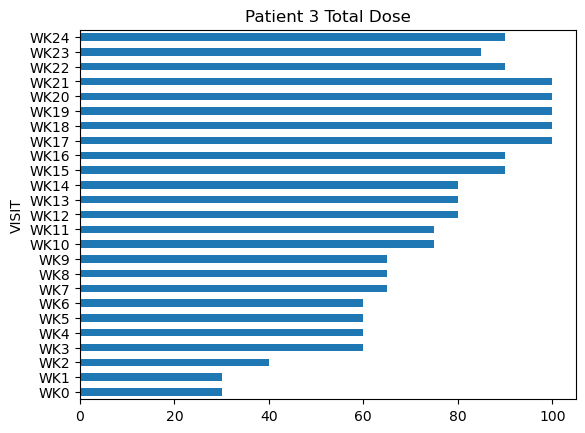

In [56]:
# visually inspect

patient_3.plot(x='VISIT', y='total_dose', kind='barh', legend=False, title='Patient 3 Total Dose')

In [57]:
# use backfill method to fill nans in medication and admin location columns

m.medication = m.medication.fillna(method='bfill')
m.admin_location = m.admin_location.fillna(method='bfill')

In [58]:
m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23528 entries, 0 to 160901
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patdeid         23528 non-null  int64  
 1   VISIT           23528 non-null  object 
 2   medication      23528 non-null  float64
 3   total_dose      23528 non-null  float64
 4   admin_location  23528 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.1+ MB


Table is ready to be merged!

In [61]:
m.to_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/clean_data/m_clean.csv', index=False)